# **THE SPARKS FOUNDATION**

## ***DATA Science & Business Analytics Internship***

**Task1:** Prediction  Using Supervised Machine Learning
Predict the percentage of the student based on the No. of Study Hours.What will be predicted score if student studies for 9.25hrs/day?

**By Pranav Deshpande**

**Importing required libraries**

In [ ]:

#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression


**Importing dataset file from url**

In [ ]:
dataset = "http://bit.ly/w-data"

In [ ]:
df = pd.read_csv(dataset)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Performing EDA**

In [ ]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
df.shape

(25, 2)

In [ ]:
df.size

50

In [ ]:
df.ndim

2

In [ ]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

****

In [ ]:
x = df.iloc[:,:-1].values
y = df.iloc[:,1].values


In [ ]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [ ]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [42]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

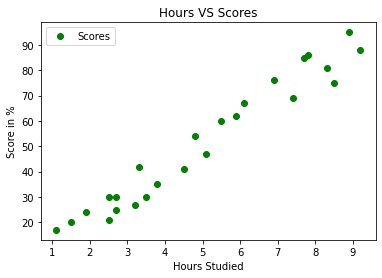

In [ ]:
df.plot(x= "Hours", y="Scores",style= "o" ,c="g")
plt.xlabel("Hours Studied")
plt.ylabel("Score in %")
plt.title("Hours VS Scores")
plt.show()


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state= 0 )


In [ ]:
lregx = LinearRegression()
lregx.fit(x_train, y_train)
print("Training has been successfully completed!")

Training has been successfully completed!


In [ ]:
print(lregx.intercept_)
print(lregx.coef_)

2.018160041434662
[9.91065648]


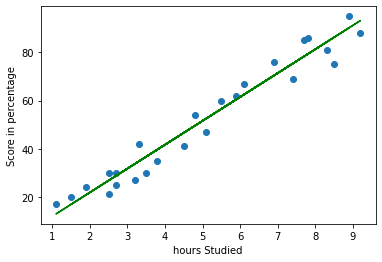

In [ ]:
line = lregx.coef_* x + lregx.intercept_  
plt.scatter(x,y)
plt.plot(x ,line, c="g")
plt.xlabel("hours Studied")
plt.ylabel("Score in percentage")
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


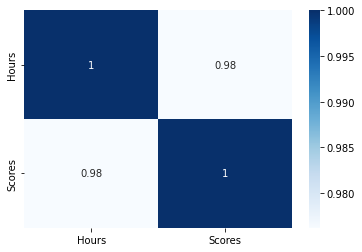

In [ ]:
#finding the correlation between data
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

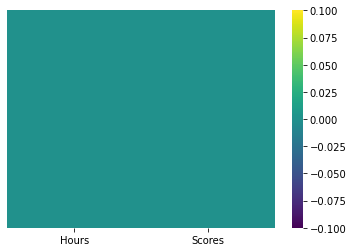

In [ ]:
#Checking for any missing values
sns.heatmap(df.isnull(),cbar=True,yticklabels=False,cmap = 'viridis')

In [ ]:
#Distribution of variables
Hours = df['Hours']
Scores = df['Scores']

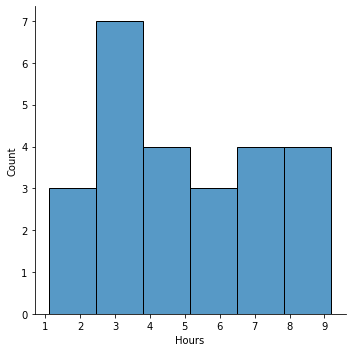

In [ ]:
sns.displot(Hours)

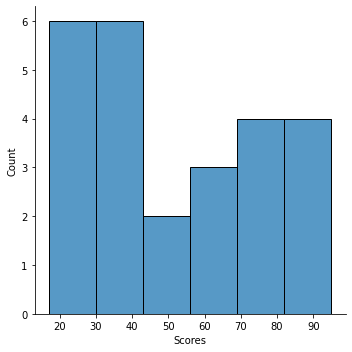

In [ ]:

sns.displot(Scores)

**Prediction**

In [ ]:
print(x_test) 
y_predict = lregx.predict(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


**Comapiring Actuals and Predicted Values**

In [ ]:
CompareDf = pd.DataFrame({'Actual':y_test,'Predicted':y_predict})
CompareDf

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


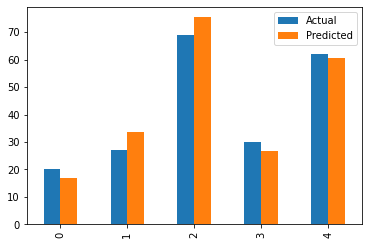

In [ ]:
CompareDf.plot(kind='bar')

In [ ]:
ErrorInDataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_predict})

**Predictions**

In [ ]:
hrs =[[9.25]]
predicted_value = lregx.predict(hrs)
print('Number of total hours : {}'.format(hrs))
print('Predicted Score : {}'.format(predicted_value[0]))

Number of total hours : [[9.25]]
Predicted Score : 93.69173248737539


In [ ]:
hrs =[[8]]
predicted_value = lregx.predict(hrs)
print('Number of total hours : {}'.format(hrs))
print('Predicted Score : {}'.format(predicted_value[0]))

Number of total hours : [[8]]
Predicted Score : 81.30341188657258


**Evaluating** **Model**

In [ ]:
#Calculating root mean squared error to evaluate model performance
print('MSE:',metrics.mean_squared_error(y_test,y_predict))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('MAE :', metrics.mean_absolute_error(y_test,y_predict))
print('R2 Score:', metrics.r2_score(y_test,y_predict))

MSE: 21.598769307217456
RMSE :  4.647447612100373
MAE : 4.183859899002982
R2 Score: 0.9454906892105354


**Result:**

**If student studies for 9.25 hrs per day then he will score 93.69173248737539%.**